The first block is used to set up the CA process. Parameters of L and T is decieded and Rule can be changed by RNO. Inital mode of cells is only the middle one cell is 1 and others are 0. Drawing function is done for testing, the final result is after the third block.

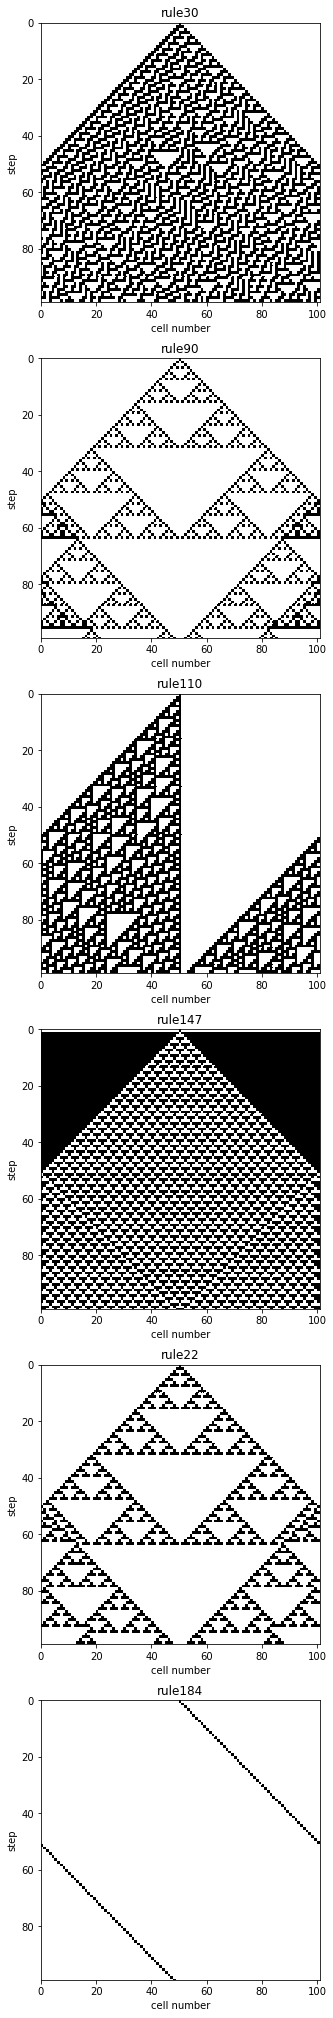

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random as rnd

#L for cell amount, T for loop time, Rule for 3bits rule, cell_i for Inital cells
#next line of cells is decided by last line
def ca_1d(l, t, rule, cell_i):
    cell = cell_i
    data = [cell]
    for i in range (t):
        cell_next  = [0 for i in range (l)]
        for j in range (l):
            neighboringstate = cell[(j-1+l)%l]*4+cell[j]*2+cell[(j+1)%l]
            cell_next[j] = rule[neighboringstate]
        cell = cell_next
        data.append(cell)
    return (data)

#Parameters
L = 101
T = 100
Seed = 100
rnd.seed(Seed)

#Rule
def T_R(RNO):
    Rule = [(RNO>>i)&1 for i in range(8)]
    return (Rule)

#Inital Cells
cell_init = [0 for i in range(L)]
cell_init[L//2] = 1

#print Graph, RNO for Rule, N for Grpah Amount and n for No.
def output_graph(RNO, N, n):
    ax = fig.add_subplot(N, 1, n)
    dataXY = ca_1d(L, T, T_R(RNO), cell_init)
    ax.pcolor(np.array(dataXY), vmin = 0, vmax = 1, cmap = plt.cm.binary)
    ax.set_xlim(0, L)
    ax.set_ylim(T-1, 0)
    ax.set_xlabel("cell number")
    ax.set_ylabel("step")
    ax.set_title("rule"+str(RNO))

#N for graph amount    
N = 6
fig = plt.figure(figsize = (5,6*N))

output_graph(30,N,1)
output_graph(90,N,2)
output_graph(110,N,3)
output_graph(147,N,4)
output_graph(22,N,5)
output_graph(184,N,6)

plt.show()


The second Block complete the five functions for calculation.

In [2]:
#Transpose the data list to make up for calculation
def transp(data):
    transposed = list(map(list, zip(*data)))
    return transposed

#P1
def calcEntropy(data):
    dic = {}
    for d in data:
        if d in dic:
            dic[d] = dic[d] + 1
        else:
            dic[d] = 1
    probdist = np.array(list(dic.values()))/(float)(len(data))
    return (sum(-p * np.log2(p) for p in probdist))

#P2
def calcJointEntropy(x,y):
    dic = {}
    for i in range (len(x)):
        d = (x[i],y[i])
        if d in dic:
            dic[d] = dic[d] + 1
        else:
            dic[d] = 1
    probdist = np.array(list(dic.values()))/(float)(len(x))
    return (sum(-p * np.log2(p) for p in probdist))

#P3
def calcMI(x,y):  
    hx = calcEntropy(x)
    hy = calcEntropy(y)
    hxy = calcJointEntropy(x,y)
    return (hx+hy-hxy)

#P4
def calcCAMList(data):
    CAMList = []
    for i in range (len(data[0])):
        CAMList.append(calcMI(data[i][0:-1],data[i][1:]))
    return (CAMList)

#P5
def calcCAMI(data):
    CAMList = calcCAMList(data)
    average = np.mean(CAMList)
    return (average)        

Finally drwa the graphs with left as the cell graph and right for the calculation graph

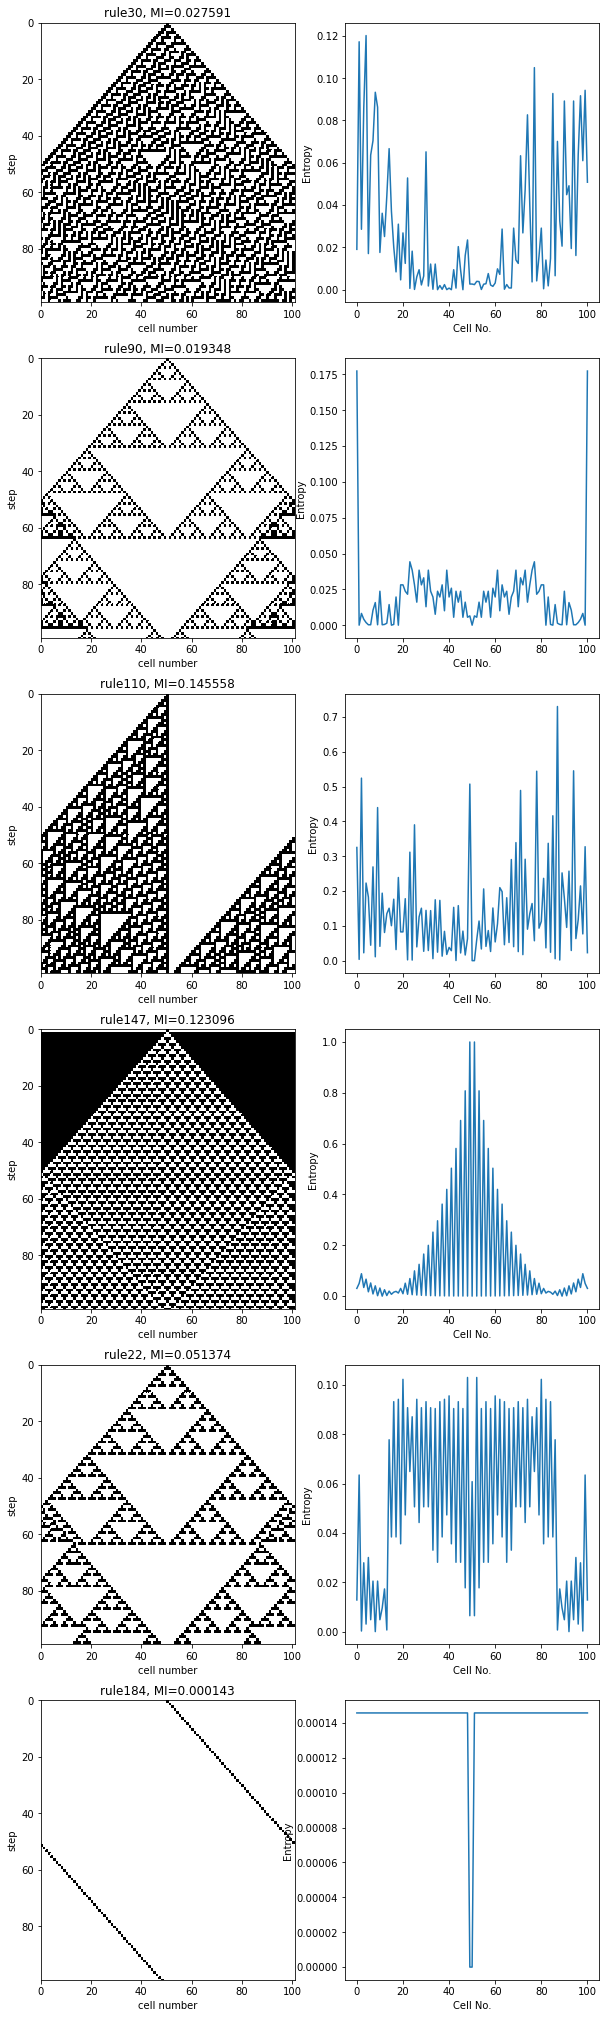

In [3]:
#print Graph
def output_graph_withMI(RNO, N, n):
    #Calculation
    dataXY = ca_1d(L, T, T_R(RNO), cell_init)
    MI = calcCAMI(transp(dataXY))
    entropy = calcCAMList(transp(dataXY))
    #Left Graph for cells
    ax = fig2.add_subplot(N, 2, n*2-1)
    ax.pcolor(np.array(dataXY), vmin = 0, vmax = 1, cmap = plt.cm.binary)
    ax.set_xlim(0, L)
    ax.set_ylim(T-1, 0)
    ax.set_xlabel("cell number")
    ax.set_ylabel("step")
    ax.set_title("rule"+str(RNO)+", MI=%3f"%MI)
    #Right Graph for Entropy
    bx = fig2.add_subplot(N, 2, n*2)
    no = [i for i in range (len(entropy))]
    bx.plot(no, entropy)
    bx.set_xlabel("Cell No.")
    bx.set_ylabel("Entropy")
       
N = 6
fig2 = plt.figure(figsize = (5*2,6*N))
output_graph_withMI(30,N,1)
output_graph_withMI(90,N,2)
output_graph_withMI(110,N,3)
output_graph_withMI(147,N,4)
output_graph_withMI(22,N,5)
output_graph_withMI(184,N,6)

plt.show()